# Google Colab 데이터 로드

In [ ]:
#Step 1. 구글 코랩에 한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
study = pd.read_csv(io.BytesIO(myfile['공부시간과시험점수.csv']),
                       encoding='cp949')
study

# 로컬 데이터 로드

In [1]:
#컴퓨터에서 작업하려면 아래 코드의 주석을 제거하고 실행하면 됩니다
import pandas as pd
study = pd.read_csv('./머신러닝실습용자료/공부시간과시험점수.csv',encoding='cp949')
study

,이름,공부시간,시험점수
0,이원재,15.0,85.0
1,맹승주,14.5,86.5
2,안미경,14.0,86.0
3,서진수,13.5,85.5
4,황경인,13.0,85.0
5,신운무,12.0,83.0
6,권율,12.0,85.0
7,강준,11.0,82.0
8,신사임당,11.0,83.0
9,문무왕,10.5,82.0


# 공통 실습 코드

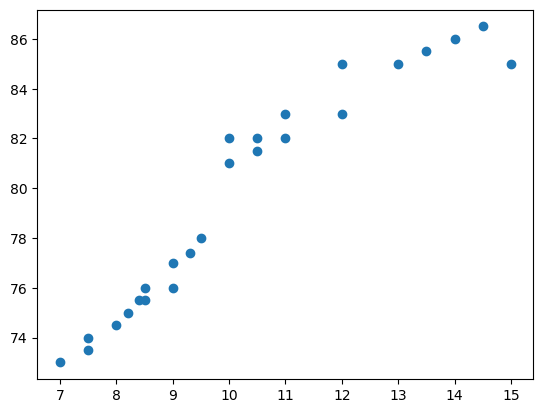

In [2]:
# data, target 정의
data = study['공부시간']
target = study['시험점수']

# 산점도 그리기
import matplotlib.pyplot as plt
plt.plot(data,target,'o')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

# train, test 데이터 나누기 위해 numpy로 변경
data = study['공부시간'].to_numpy()
target = study['시험점수'].to_numpy()

# 훈련 세트와 테스트 세트로 나눕니다.
train_data,test_data,train_target,test_target = train_test_split(
    data, target, test_size=0.2, random_state=40)

In [4]:
# shape 확인
train_data.shape

(20,)

In [5]:
# data 전체 확인
train_data

array([13.5,  8. , 14. , 10. ,  8.5, 13. , 11. ,  9. ,  7.5,  8.2, 15. ,
       10.5, 10.5,  7.5, 10. , 14.5,  8.5, 12. , 11. , 12. ])

In [6]:
# reshape 함수에 -1을 넣으면, rows은 자동으로 입력해달라는 뜻
# 즉, column을 1개로 내가 정했으니, 남은 데이터는 알아서 row에 잘 넣어주세요.
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [7]:
# shape 확인
train_data.shape

(20, 1)

In [8]:
# data 전체 확인
train_data

array([[13.5],
       [ 8. ],
       [14. ],
       [10. ],
       [ 8.5],
       [13. ],
       [11. ],
       [ 9. ],
       [ 7.5],
       [ 8.2],
       [15. ],
       [10.5],
       [10.5],
       [ 7.5],
       [10. ],
       [14.5],
       [ 8.5],
       [12. ],
       [11. ],
       [12. ]])

In [9]:
# 선형회귀모델 학습\
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_data,train_target)

LinearRegression()

In [10]:
# 점수 확인(lr.score는 결정계수R2에 대한 정확도를 의미합니다.)
print(lr.score(train_data , train_target))
print(lr.score(test_data , test_target))

0.886911457690887
0.8367662584885617


In [11]:
# 16이라는 값을 넣었을 때 예상 결과값 확인
lr.predict([[16]])

array([90.12423029])

In [12]:
# 회귀계수 확인
print(lr.coef_ , lr.intercept_)

[1.80042161] 61.31748460585439


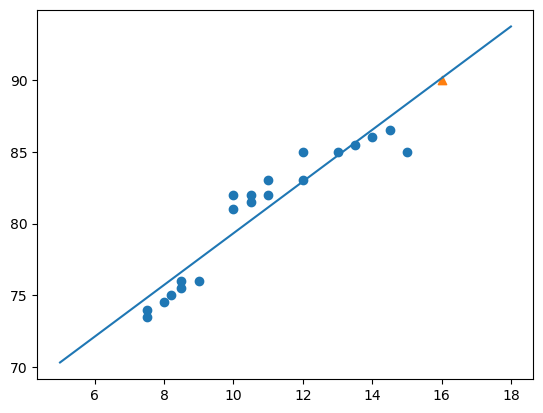

In [13]:
import matplotlib.pyplot as plt
plt.scatter(train_data , train_target)
plt.plot( [5,18], [5*lr.coef_ +lr.intercept_ ,
                    18*lr.coef_ + lr.intercept_])
plt.scatter(16 , 90 ,marker="^")
plt.show()

## 다항회귀분석 적용

In [14]:
# 다항회귀분석 적용
import numpy as np
train_data_poly = np.column_stack(( train_data ** 2, train_data))
test_data_poly = np.column_stack((test_data ** 2 , test_data))

lr = LinearRegression()
lr.fit(train_data_poly , train_target)
lr.score(test_data_poly , test_target)

0.5052713132458166

In [15]:
lr.predict([[16**2,16]])

array([85.24161226])

In [16]:
print(lr.score(train_data_poly , train_target))
print(lr.score(test_data_poly , test_target))

0.9686934811074566
0.5052713132458166
